In [1]:
from google.colab import files
upload= files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Activation
from keras.losses import mae
from keras import Sequential
from keras.utils.vis_utils import plot_model
from sklearn import metrics
import csv


In [ ]:
Model= Sequential([
                   Dense(units=16, input_shape=(1,) ,activation='relu'),
                   Dense(units=32, activation='relu'),
                   Dense(units=64, activation='relu'),
                   Dense(units=2, activation='softmax')
                  
])


In [4]:
dataset= pd.read_csv('StudentsPerformance.csv')

To get the shape of Pandas DataFrame, use DataFrame. shape. The shape property returns a tuple representing the dimensionality of the DataFrame. The format of shape would be (rows, columns).

In [5]:
dataset.shape


(1000, 8)

The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [6]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


by default the .head() method will show the first 5 entries you can pass in an integer number to view as much as you need to see dataset entries.

unless your screen is quite large, your output probably won’t display all 23 columns. Somewhere in the middle, you’ll see a column of ellipses (...) indicating the missing data.

In [7]:
dataset.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


The tail() function is used to get the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows

In [ ]:
dataset.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


One of the most important steps to help you design a good model is to know your data.and to discover the different data types it contains. While you can put anything into a list, the columns of a DataFrame contain values of a specific data type.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


It’s time to get an overview of the values each column contains. You can do this with
The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column:the mean, the standard deviation, the minimum and maximum value and the lowest percentile 25% of numbers.  percentile: 50%  and the third percentile: 75%

In [8]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


for the non numirical data, the dicribe function will not calculate the mean and STD etc but it will still display some vlaues 

In [ ]:
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

nunique() function return Series with number of distinct observations over requested axis. If we set the value of axis to be 0, then it finds the total number of unique observations over the index axis. If we set the value of axis to be 1, then it find the total number of unique observations over the column axis.

In [ ]:
dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

you can also ask for specific objects unique values 

In [ ]:
dataset['parental level of education'].nunique

<bound method IndexOpsMixin.nunique of 0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object>

In [ ]:
dataset['parental level of education'].nunique()

6

isnull(obj)[source] Detect missing values for an array-like object. This function takes a scalar or array-like object and indicates whether values are missing ( NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

The fillna() method replaces the NULL values with a specified value. The fillna() method returns a new DataFrame object unless the inplace parameter is set to True , in that case the fillna() method does the replacing in the original DataFrame instead.

In [ ]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. 
This is usually used to drop out the inference label 

In [13]:
studetn= dataset.drop(['race/ethnicity', 'parental level of education'],axis=1)

In [14]:
studetn.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

The Pandas corr will ignore the pairwise correlation if it has NaN value in one of the observations. We can verify that by removing the those values and checking the results. by default the method for correlation is pearson if not specified but other methods are below

Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

In [19]:
corelation=studetn.corr()

In [18]:
print(corelation)

               math score  reading score  writing score
math score       1.000000       0.617432       0.591067
reading score    0.617432       1.000000       0.820058
writing score    0.591067       0.820058       1.000000


now understanding the corelation concept and the diffrent methods is very important because it will help you make sense of the causation of the events and main trends in your data. 

correlation coefficients (in absolute value) which are < 0.35 are generally considered to represent low or weak correlations, 0.36 to 0.67 modest or moderate correlations, and 0.68 to 1.0 strong or high correlations with r coefficients > 0.90 very high

In [23]:
corelation2= studetn.corr('spearman')

In [24]:
corelation2

,math score,reading score,writing score
math score,1.000000,0.804064,0.778339
reading score,0.804064,1.000000,0.948953
writing score,0.778339,0.948953,1.000000


# data visualisation


In this section you will be looking at diffrent methods to visualise your data - choosing the correct method to describe your data is something comes down to your style. but it is crucial to choose the correct way.

Seaborn pakage has a heatmap method

A heatmap is a graphical two-dimensional  representation of data that uses a system of color-coding to represent different values. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.

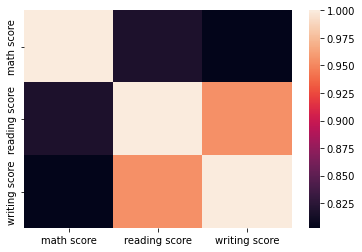

In [ ]:
sns.heatmap(corelation)


you should notice that the corelation study we have created above and the correlation heatmaps contain the same information in a visually appealing way. What more: they show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems.
here is some of the attributes you can use to make your heatmap clearer:

1- vmin, vmax — set the range of values that serve as the basis for the colormap

2-cmap — sets the specific colormap we want to use (check out the library of a wild range of color palettes here)

3- center — takes a float to center the colormap; if no cmap specified, will change the colors in the default colormap; if set to True — it changes all the colors of the colormap to blues

4- annot — when set to True, the correlation values become visible on the colored cells

5- cbar — when set to False, the colorbar (that serves as a legend) disappears

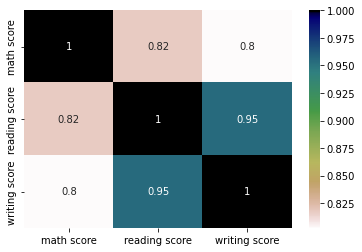

In [27]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,cmap='gist_earth_r',annot=True)

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 
huename of variable in data
Variable in data to map plot aspects to different colors.

hue_orderlist of strings
Order for the levels of the hue variable in the palette

palettedict or seaborn color palette
Set of colors for mapping the hue variable. If a dict, keys should be values in the hue variable.

varslist of variable names
Variables within data to use, otherwise use every column with a numeric datatype.

{x, y}_varslists of variable names
Variables within data to use separately for the rows and columns of the figure; i.e. to make a non-square plot.

kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}
Kind of plot to make.

diag_kind{‘auto’, ‘hist’, ‘kde’, None}
Kind of plot for the diagonal subplots. If ‘auto’, choose based on whether or not hue is used.

markerssingle matplotlib marker code or list
Either the marker to use for all scatterplot points or a list of markers with a length the same as the number of levels in the hue variable so that differently colored points will also have different scatterplot markers.

heightscalar
Height (in inches) of each facet.

aspectscalar
Aspect * height gives the width (in inches) of each facet.

cornerbool
If True, don’t add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.

dropnaboolean
Drop missing values from the data before plotting.


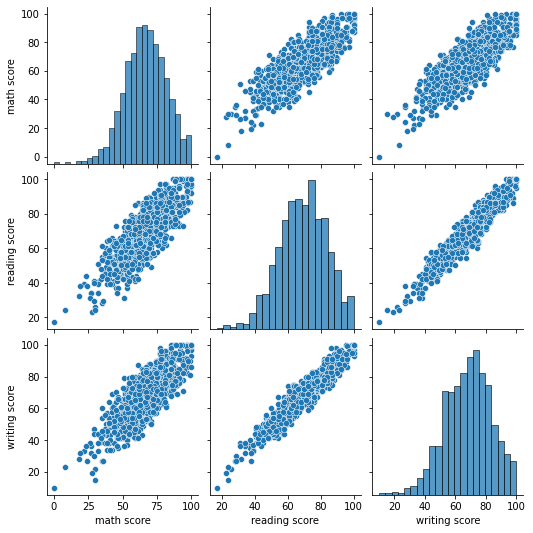

In [ ]:
sns.pairplot(studetn)

Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)



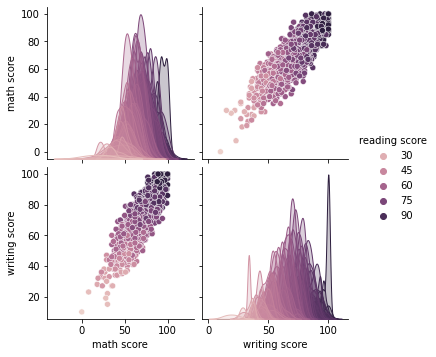

In [34]:
sns.pairplot(studetn, hue='reading score')


It’s possible to force marginal histograms:



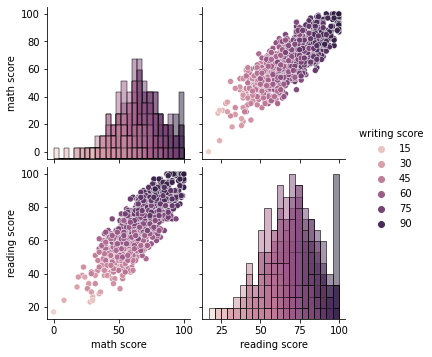

In [31]:
sns.pairplot(studetn, hue="writing score", diag_kind="hist")


now, the one plot that is usd the most is relplo() . 
This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. 
relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets.

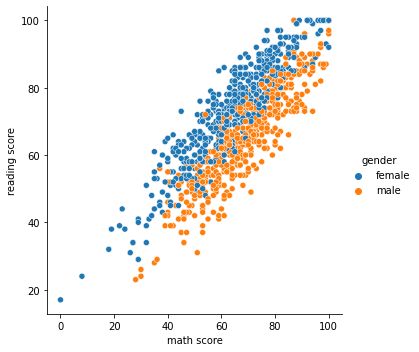

In [ ]:
sns.relplot(x='math score', y= 'reading score', hue='gender', data= studetn)


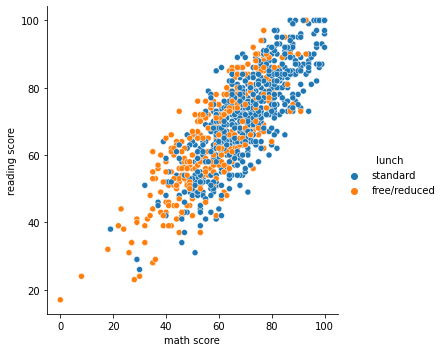

In [ ]:
sns.relplot(x='math score', y= 'reading score', hue='lunch', data= studetn)


distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. The kind parameter selects the approach to use:

histplot() (with kind="hist"; the default)

kdeplot() (with kind="kde")

ecdfplot() (with kind="ecdf"; univariate-only)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


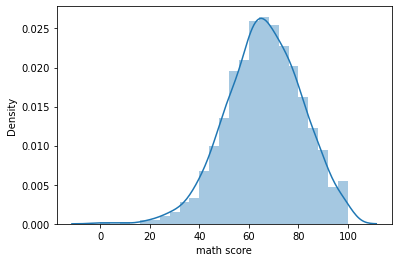

In [ ]:
sns.distplot(studetn['math score'])

 Distplot represents the overall distribution of continuous data variables

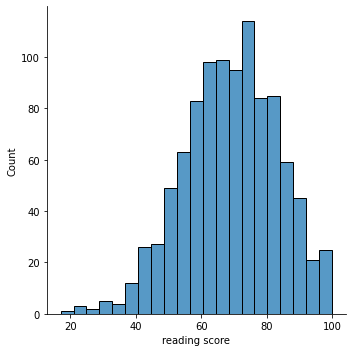

In [36]:
sns.displot(studetn['reading score'], kind= 'hist')

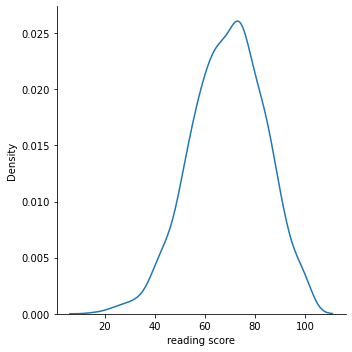

In [37]:
sns.displot(studetn['reading score'], kind= 'kde')

histogram is “distplot” for distribution plot. As usual, Seaborn's distplot can take the column from Pandas dataframe as argument to make histogram. By default, the histogram from Seaborn has multiple elements built right into it. Seaborn can infer the x-axis label and its ranges.

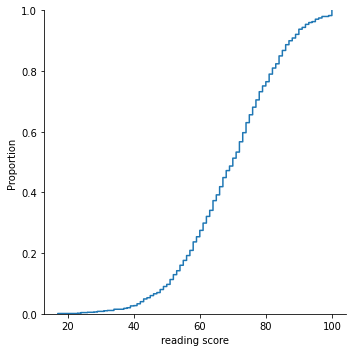

In [38]:
sns.displot(studetn['reading score'], kind= 'ecdf')

catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables. The first named variable is innermost on the display; that is, its categories vary fastest. catplot is a wrapper for graph hbar (default) or graph bar or graph dot.
This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

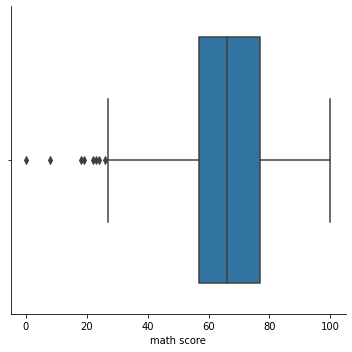

In [ ]:
sns.catplot(x='math score', kind='box', data= studetn)

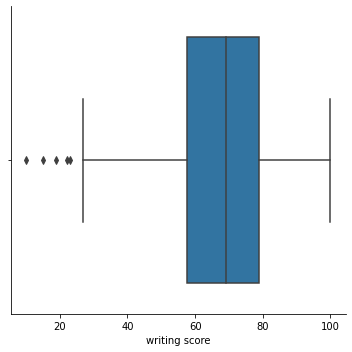

In [ ]:
sns.catplot(x='writing score', kind='box', data= studetn)